<a href="https://colab.research.google.com/github/leo0622nycu/Essay/blob/main/ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 0. 安裝需要的套件
# --------------------------
!pip install pandas openpyxl matplotlib seaborn scipy statsmodels

# --------------------------
# 1. 載入套件
# --------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# 2. 讀取你的Excel檔案
# --------------------------
# 請先上傳你的Excel檔到Colab左邊的小夾子
# 假設你的檔案名叫 revenue_data.xlsx
df = pd.read_csv('/content/drive/MyDrive/CSV/Historical_Monthly_Revenue_November_2.csv')
# 確認欄位名稱
print(df.columns)

# Step 1: 將 `time` 轉換成日期時間格式 (YYYY-MM)
df['time'] = pd.to_datetime(df['time'], format='%Y%m')


# Step 2: 設定 `time` 為索引
df.set_index('time', inplace=True)

# Step 3: 檢查處理後的資料
print("處理後的資料摘要：")
print(df.info())
print("\n前5筆資料：")
print(df.head())

Mounted at /content/drive
Index(['time', 'revenue'], dtype='object')
處理後的資料摘要：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2014-01-01 to 2024-11-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  131 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB
None

前5筆資料：
            revenue
time               
2014-01-01    51430
2014-02-01    46829
2014-03-01    49956
2014-04-01    61887
2014-05-01    60789


/tmp/ipython-input-3-3845294285.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series.dropna(), nlags="auto")[1]
/tmp/ipython-input-3-3845294285.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), nlags="auto")[1]
/tmp/ipython-input-3-3845294285.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), nlags="auto")[1]
/tmp/ipython-input-3-3845294285.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dro

d=0           ADF p=0.998  KPSS p=0.010
d=1           ADF p=0.540  KPSS p=0.042
d=2           ADF p=0.210  KPSS p=0.100
d=3           ADF p=0.171  KPSS p=0.100
d=4           ADF p=0.101  KPSS p=0.100


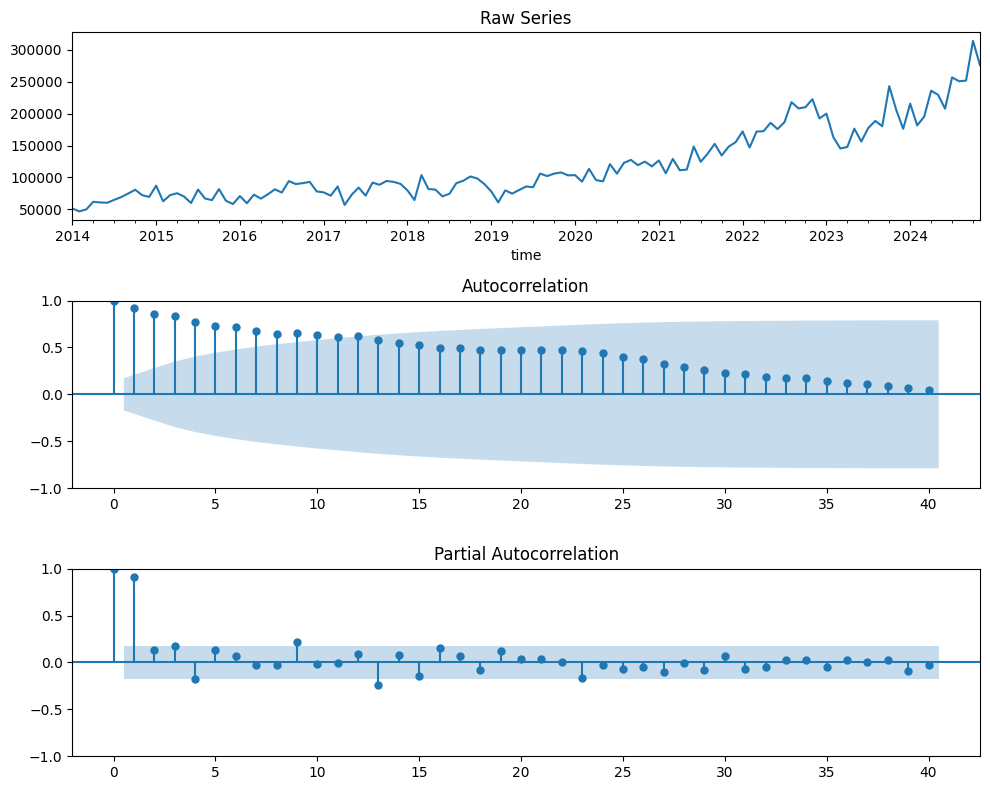

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ts = df.iloc[:, 0]                         # 單欄 Series
ts.head()
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ts.plot(ax=ax[0], title="Raw Series")
plot_acf(ts, lags=40, ax=ax[1])
plot_pacf(ts, lags=40, ax=ax[2])
plt.tight_layout()

from statsmodels.tsa.stattools import adfuller, kpss

def adf_kpss_report(series, name):
    adf_p = adfuller(series.dropna())[1]
    kpss_p = kpss(series.dropna(), nlags="auto")[1]
    print(f"{name:<12}  ADF p={adf_p:.3f}  KPSS p={kpss_p:.3f}")

for d in range(5):                         # 通常 d ≤ 2 足夠
    diffed = ts.diff(d).dropna() if d else ts
    adf_kpss_report(diffed, f"d={d}")